<a href="https://colab.research.google.com/github/mrromaniuc/quantum-computing/blob/main/QC_Quantum_Fourier_Transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
#@title
#Installing qiskit standalone
!pip install imgaug==0.2.5
#!pip install qiskit==0.36.1
!pip install qiskit -U
!pip install pylatexenc
#Next lines for LaTeX
#!pip install latex
#!apt-get install cm-super
#!apt-get install dvipng 
#!apt install texlive texlive-latex-extra texlive-fonts-recommended dvipng

In [17]:
from qiskit.circuit.library import QFT
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_multivector
import warnings
warnings.filterwarnings('ignore')
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [34]:
def show_fbasis(state, comp_basis=True, fbasis=True):
  """ Given a state represented as string (example '001') the function displays the representation of the state in the computational basis as well as in the fourier basis 
      comp_basis - if set to False, does NOT show the bloch sphere for the computational basis"""
  qc = QuantumCircuit(len(state))
  qc.initialize(Statevector.from_label(state).data, qc.qubits[::-1])

  cbasis_bloch = plot_bloch_multivector(Statevector.from_instruction(qc).data)
  if comp_basis:
    print(f"Computational basis |{state}>")
    display(cbasis_bloch)

  qc.append(QFT(len(state), do_swaps=True), qc.qubits)
  fbasis_bloch = plot_bloch_multivector(Statevector.from_instruction(qc).data)
  if fbasis:
    print(f"Fourier basis |{state}>")
    display(fbasis_bloch)
  return cbasis_bloch, fbasis_bloch

Computational basis |000>


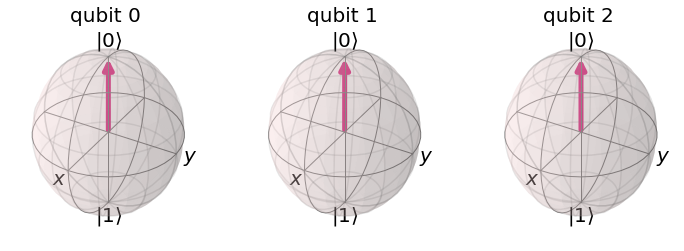

Fourier basis |000>


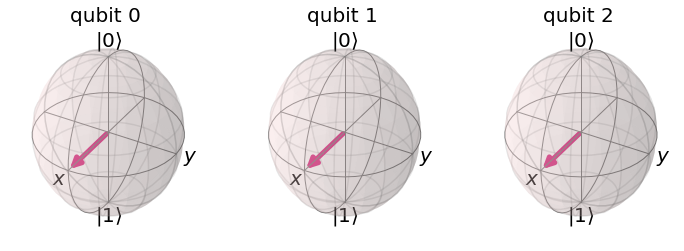

(<Figure size 864x288 with 3 Axes>, <Figure size 864x288 with 3 Axes>)

In [35]:
show_fbasis('000')

Computational basis |001>


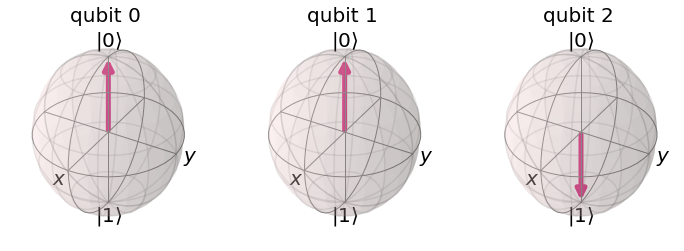

Fourier basis |001>


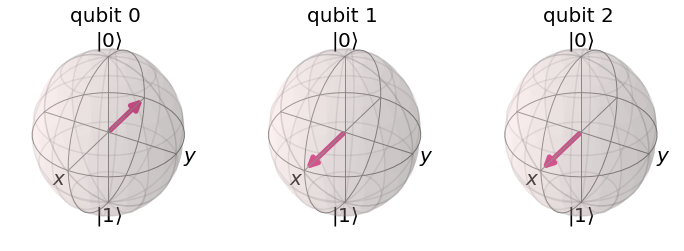

(<Figure size 864x288 with 3 Axes>, <Figure size 864x288 with 3 Axes>)

In [36]:
show_fbasis('001')

000
Fourier basis |000>


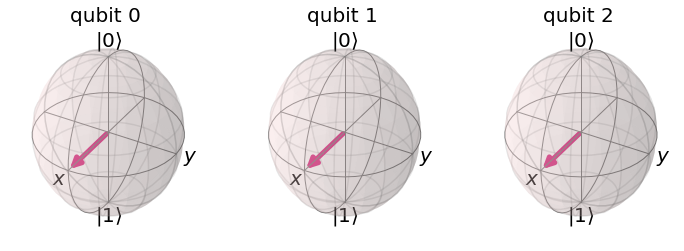

001
Fourier basis |001>


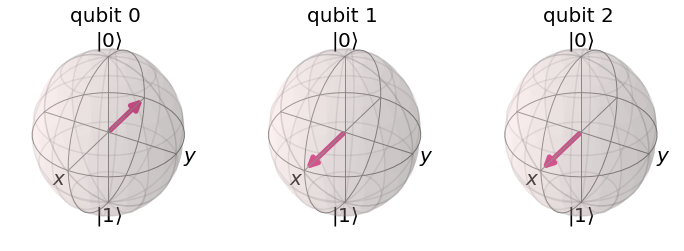

010
Fourier basis |010>


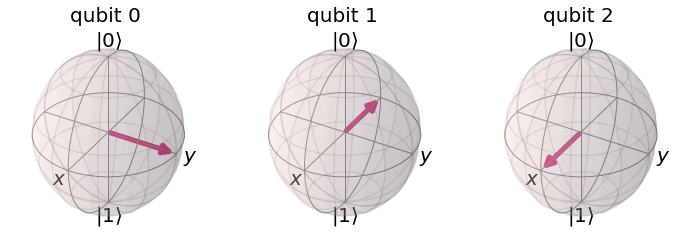

011
Fourier basis |011>


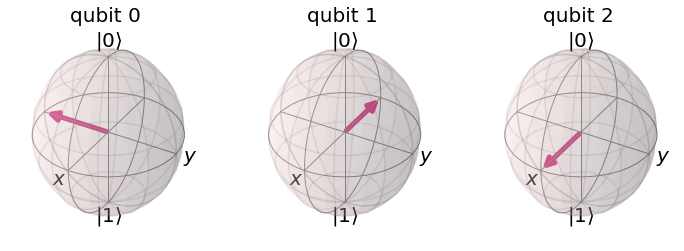

100
Fourier basis |100>


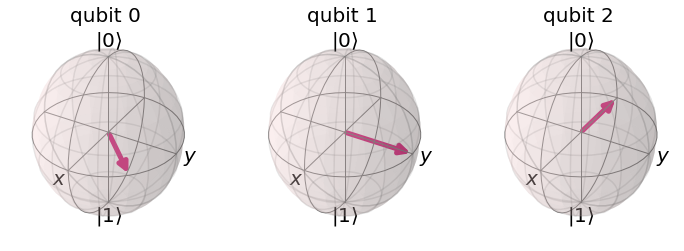

101
Fourier basis |101>


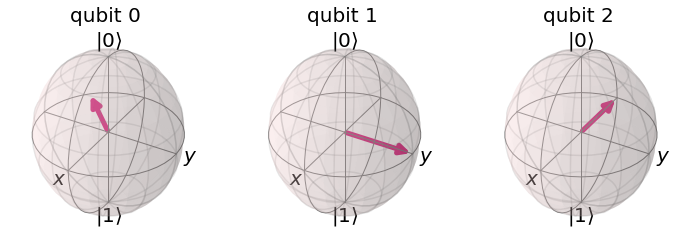

110
Fourier basis |110>


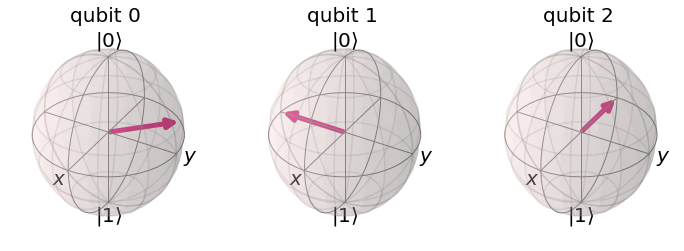

111
Fourier basis |111>


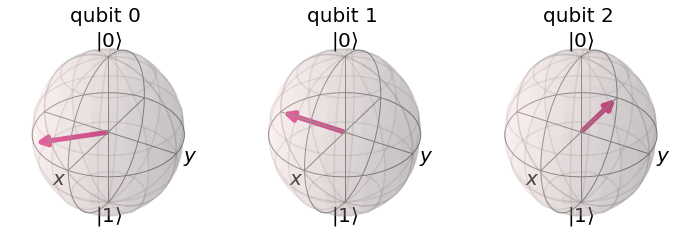

In [37]:
num_qubits = 3
for i in range(0,2**num_qubits):
  qubits = f"{bin(i)[2:]:0>{num_qubits}}"
  print(qubits)
  show_fbasis(qubits, False)

In [48]:
cache = {}

def helper(qubit):
  num_qubits = 3
  if len(cache)==0:
    for i in range(0,2**num_qubits):
      qubits = f"{bin(i)[2:]:0>{num_qubits}}"
      (cbasis_bloch, fbasis_bloch) = show_fbasis(qubits, False, False)
      cache[i]= fbasis_bloch

  qubit_val = f"{bin(qubit)[2:]:0>{num_qubits}}"
  print(f"|{qubit_val}>")
  display(cache[qubit])

interact(helper, qubit=widgets.IntSlider(min=0, max=7, step=1, value=0))

interactive(children=(IntSlider(value=0, description='qubit', max=7), Output()), _dom_classes=('widget-interac…

<function __main__.func(qubit)>